<a href="https://colab.research.google.com/github/Aravinth13-code/ShadowFox/blob/main/Boston%20House%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Predict Boston house prices using the dataset "boston_house_prices.csv" by implementing a regression model including data preprocessing, model selection, training, and evaluation.

## Load the data

### Subtask:
Load the dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv("HousingData.csv")
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Explore the data

### Subtask:
Perform exploratory data analysis to understand the structure of the data, identify missing values, and visualize the relationships between features and the target variable (house prices).


**Reasoning**:
Perform exploratory data analysis by displaying data types, checking for missing values, displaying descriptive statistics, generating and visualizing the correlation matrix, and creating scatter plots of key features against the target variable to understand the data structure and relationships.



Data Types:


,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64



Missing Values:


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0



Descriptive Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



Correlation Matrix:


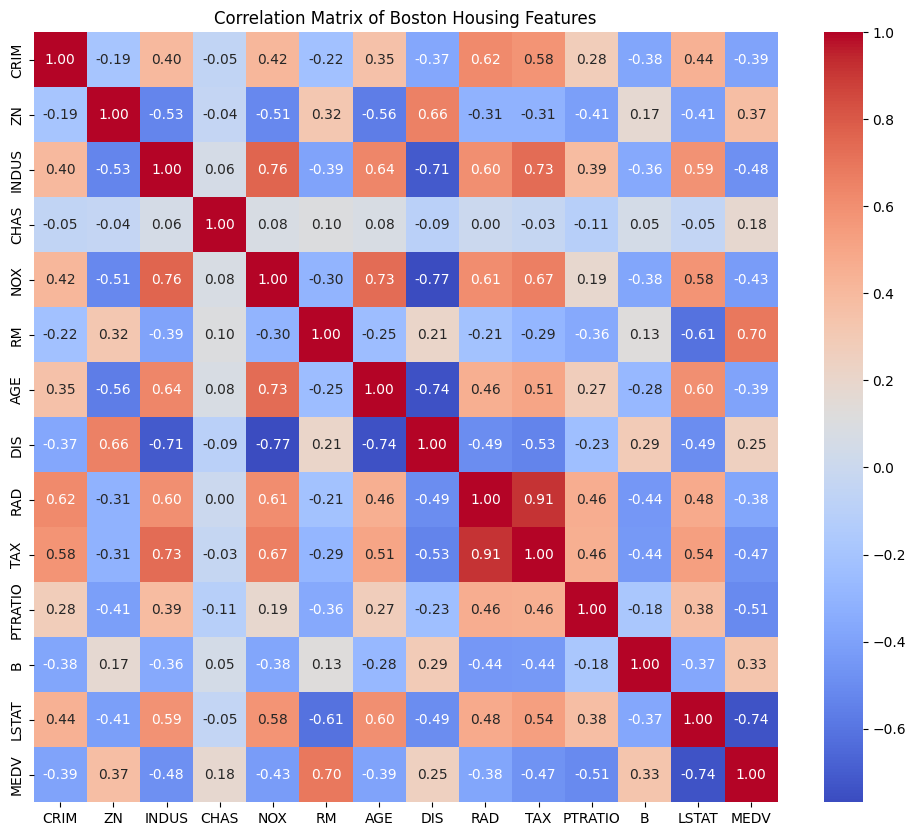

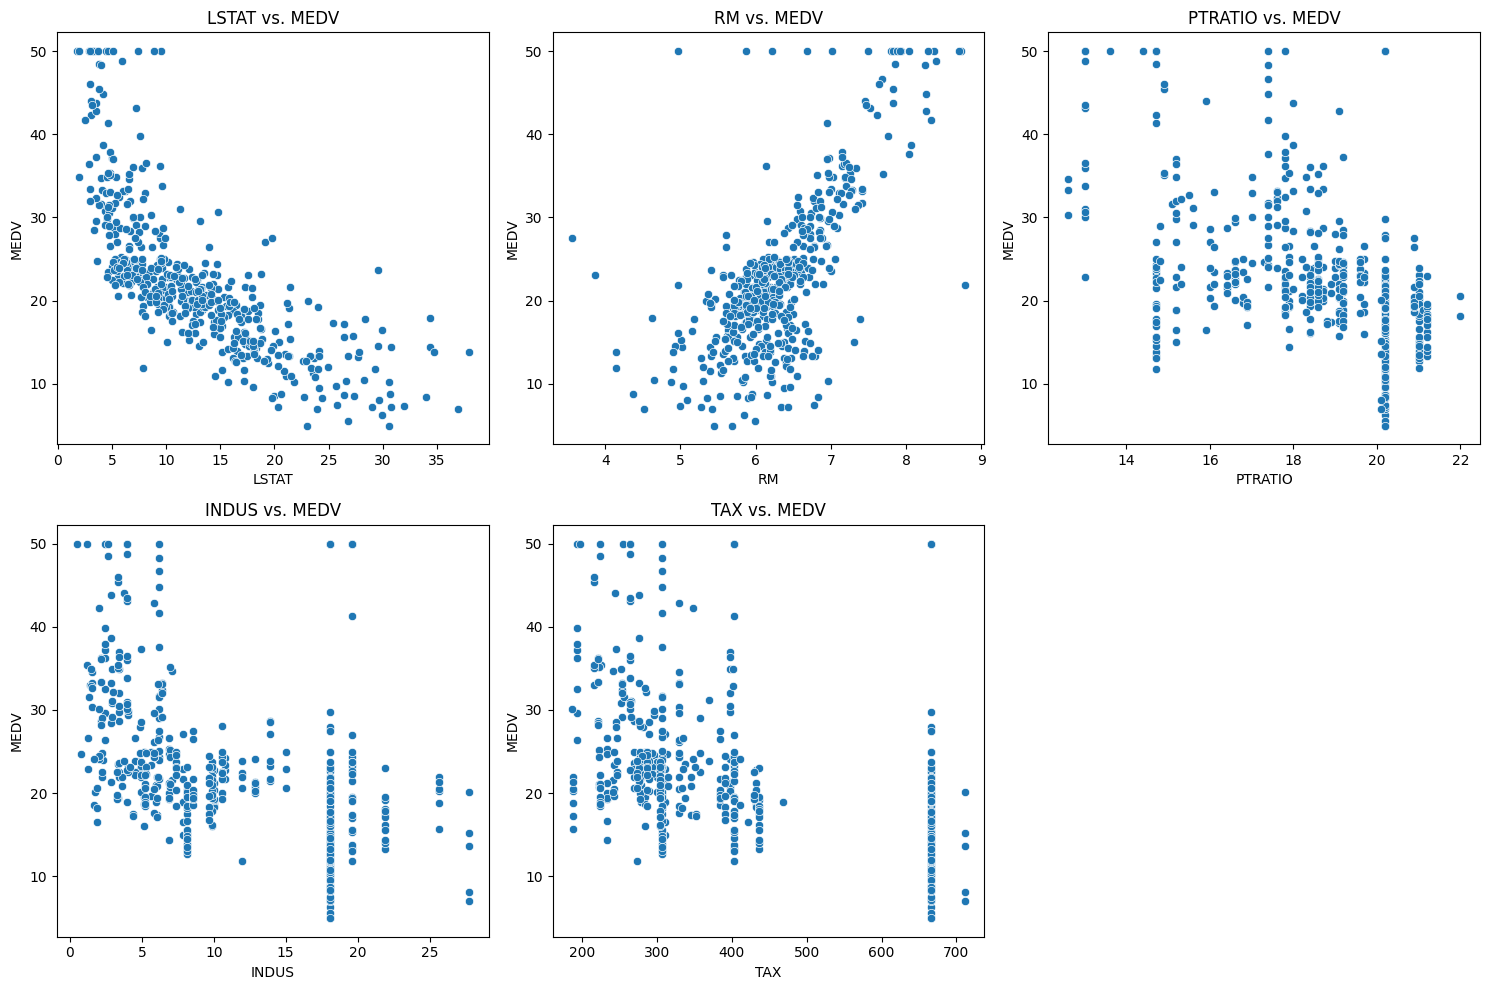

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display data types
print("Data Types:")
display(df.dtypes)

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Generate and visualize the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

# Create scatter plots for key features vs. MEDV
key_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='MEDV', data=df)
    plt.title(f'{feature} vs. MEDV')
plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features if any, and scale numerical features as needed.


**Reasoning**:
Handle missing values by imputing with the mean, check for categorical features and encode if necessary, and scale numerical features using StandardScaler. Finally, verify the data and display the head.



In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
columns_with_missing = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

# Check for categorical features - Based on the previous exploration, there are no obvious categorical features that require encoding.
# The features like CHAS are binary (0 or 1), which can be treated as numerical for this model.

# Identify numerical features to scale (all features except the target 'MEDV')
numerical_features = df.columns.tolist()
numerical_features.remove('MEDV')

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify that there are no remaining missing values
print("\nMissing Values after processing:")
display(df.isnull().sum())

# Display the head of the processed DataFrame
print("\nProcessed DataFrame Head:")
display(df.head())


Missing Values after processing:


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0



Processed DataFrame Head:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-0.121059,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146,24.0
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,0.378716,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.510353,21.6
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-0.270627,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748,34.7
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-0.828770,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333,33.4
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-0.522338,1.077737,-0.752922,-1.106115,0.113032,0.441052,0.000000,36.2


## Split the data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


## Select and train a model

### Subtask:
Choose a regression model (e.g., Linear Regression, Ridge, Lasso, or a tree-based model) and train it on the training data.


**Reasoning**:
Import the Linear Regression model and train it on the training data.



In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared.


**Reasoning**:
Calculate and print the evaluation metrics (MSE, RMSE, R-squared) for the trained model on the test data.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 25.02
Root Mean Squared Error (RMSE): 5.00
R-squared (R2): 0.66


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the trained model to make predictions on the test set and store them in a variable.



In [10]:
y_pred = model.predict(X_test)

## Summary:

### Data Analysis Key Findings

*   There were 20 missing values each in the 'CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', and 'LSTAT' columns.
*   'LSTAT' and 'RM' showed strong correlations with the target variable 'MEDV' (house prices).
*   Missing values were successfully imputed using the mean of the respective columns.
*   All numerical features except the target 'MEDV' were scaled using `StandardScaler`.
*   The dataset was split into training and testing sets with a test size of 20%.
*   A Linear Regression model was trained on the training data.
*   The model's performance on the testing data yielded the following metrics: Mean Squared Error (MSE): 25.02, Root Mean Squared Error (RMSE): 5.00, and R-squared (R2): 0.66.

### Insights or Next Steps

*   The R-squared value of 0.66 suggests that the linear regression model explains a moderate amount of the variance in house prices. Exploring more complex models or feature engineering could potentially improve performance.
*   Investigating the features with strong correlations to 'MEDV' (like 'LSTAT' and 'RM') further might reveal additional insights or opportunities for model improvement.
